##Assignment 2
Students have to create the dataset with null values, outliers and inconsistancies. Here existing dataset from kaggle is used and modiefied.
###Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.

Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

Dataset description
This dataset contains marks of students in math, reading and writing. The main objective of analyzing this data is to understand which factors influence students performance the most. The variables considered are race, the level of education of the parents, diet and the way in which the students prepared for the exams.

This dataset is composed of the following variables:

gender: Male or female.
race/ethnicity: Grouped from A to E.
parental level of education: Grouped from high school to master's degree.
lunch: Type of lunch (standard or reduced).
test preparation course: If a student did the test preparation course before the exams.
math score
reading score
writing score

In [3]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Load and review data

In [4]:

dataset = pd.read_csv("./StudentsPerformance_modified.csv")  
dataset.shape

(1000, 8)

In [5]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [6]:
dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [7]:
dataset.rename(columns={'math score':'Math_score'}, inplace=True)

In [8]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [9]:
mathIsDigit = pd.DataFrame(dataset.Math_score.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
dataset[mathIsDigit['Math_score'] == False]   # from temp take only those rows where hp has false

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0
434,male,group C,some high school,standard,none,?,66.0,66.0
435,male,group C,some college,free/reduced,completed,?,48.0,53.0
436,male,group D,associate's degree,standard,none,?,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,?,66.0,73.0
438,male,group C,high school,standard,none,?,56.0,51.0
439,male,group D,some high school,standard,completed,?,88.0,82.0
440,female,group C,some college,standard,completed,?,81.0,79.0
441,female,group D,high school,standard,none,?,81.0,80.0


In [10]:
dataset = dataset.replace('?', np.nan)  # replace them with mean value
dataset[mathIsDigit['Math_score'] == False] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,NaN,56.0,55.0
433,female,group A,some high school,free/reduced,none,NaN,59.0,50.0
434,male,group C,some high school,standard,none,NaN,66.0,66.0
435,male,group C,some college,free/reduced,completed,NaN,48.0,53.0
436,male,group D,associate's degree,standard,none,NaN,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,NaN,66.0,73.0
438,male,group C,high school,standard,none,NaN,56.0,51.0
439,male,group D,some high school,standard,completed,NaN,88.0,82.0
440,female,group C,some college,standard,completed,NaN,81.0,79.0
441,female,group D,high school,standard,none,NaN,81.0,80.0


In [11]:
dataset = dataset.replace(np.nan, np.mean(dataset['Math_score'].astype(float)))  # replace them with mean value
dataset[mathIsDigit['Math_score'] == False] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,66.323929,56.0,55.0
433,female,group A,some high school,free/reduced,none,66.323929,59.0,50.0
434,male,group C,some high school,standard,none,66.323929,66.0,66.0
435,male,group C,some college,free/reduced,completed,66.323929,48.0,53.0
436,male,group D,associate's degree,standard,none,66.323929,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,66.323929,66.0,73.0
438,male,group C,high school,standard,none,66.323929,56.0,51.0
439,male,group D,some high school,standard,completed,66.323929,88.0,82.0
440,female,group C,some college,standard,completed,66.323929,81.0,79.0
441,female,group D,high school,standard,none,66.323929,81.0,80.0


In [12]:
labelencoder = LabelEncoder()
dataset_new = dataset.copy()
dataset_new["parental level of education"] = labelencoder.fit_transform(dataset_new["parental level of education"])
dataset_new["test preparation course"] = labelencoder.fit_transform(dataset_new["test preparation course"])
dataset_new["lunch"] = labelencoder.fit_transform(dataset_new["lunch"])
dataset_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,1,1,1,72,72.0,74.0
1,female,group C,4,1,0,69,90.0,88.0
2,female,group B,3,1,1,90,95.0,93.0
3,male,group A,0,0,1,47,57.0,44.0
4,male,group C,4,1,1,76,78.0,75.0


In [13]:
dataset_new.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
Math_score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
!pip install missingno


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [15]:
import missingno as msno

<Axes: >

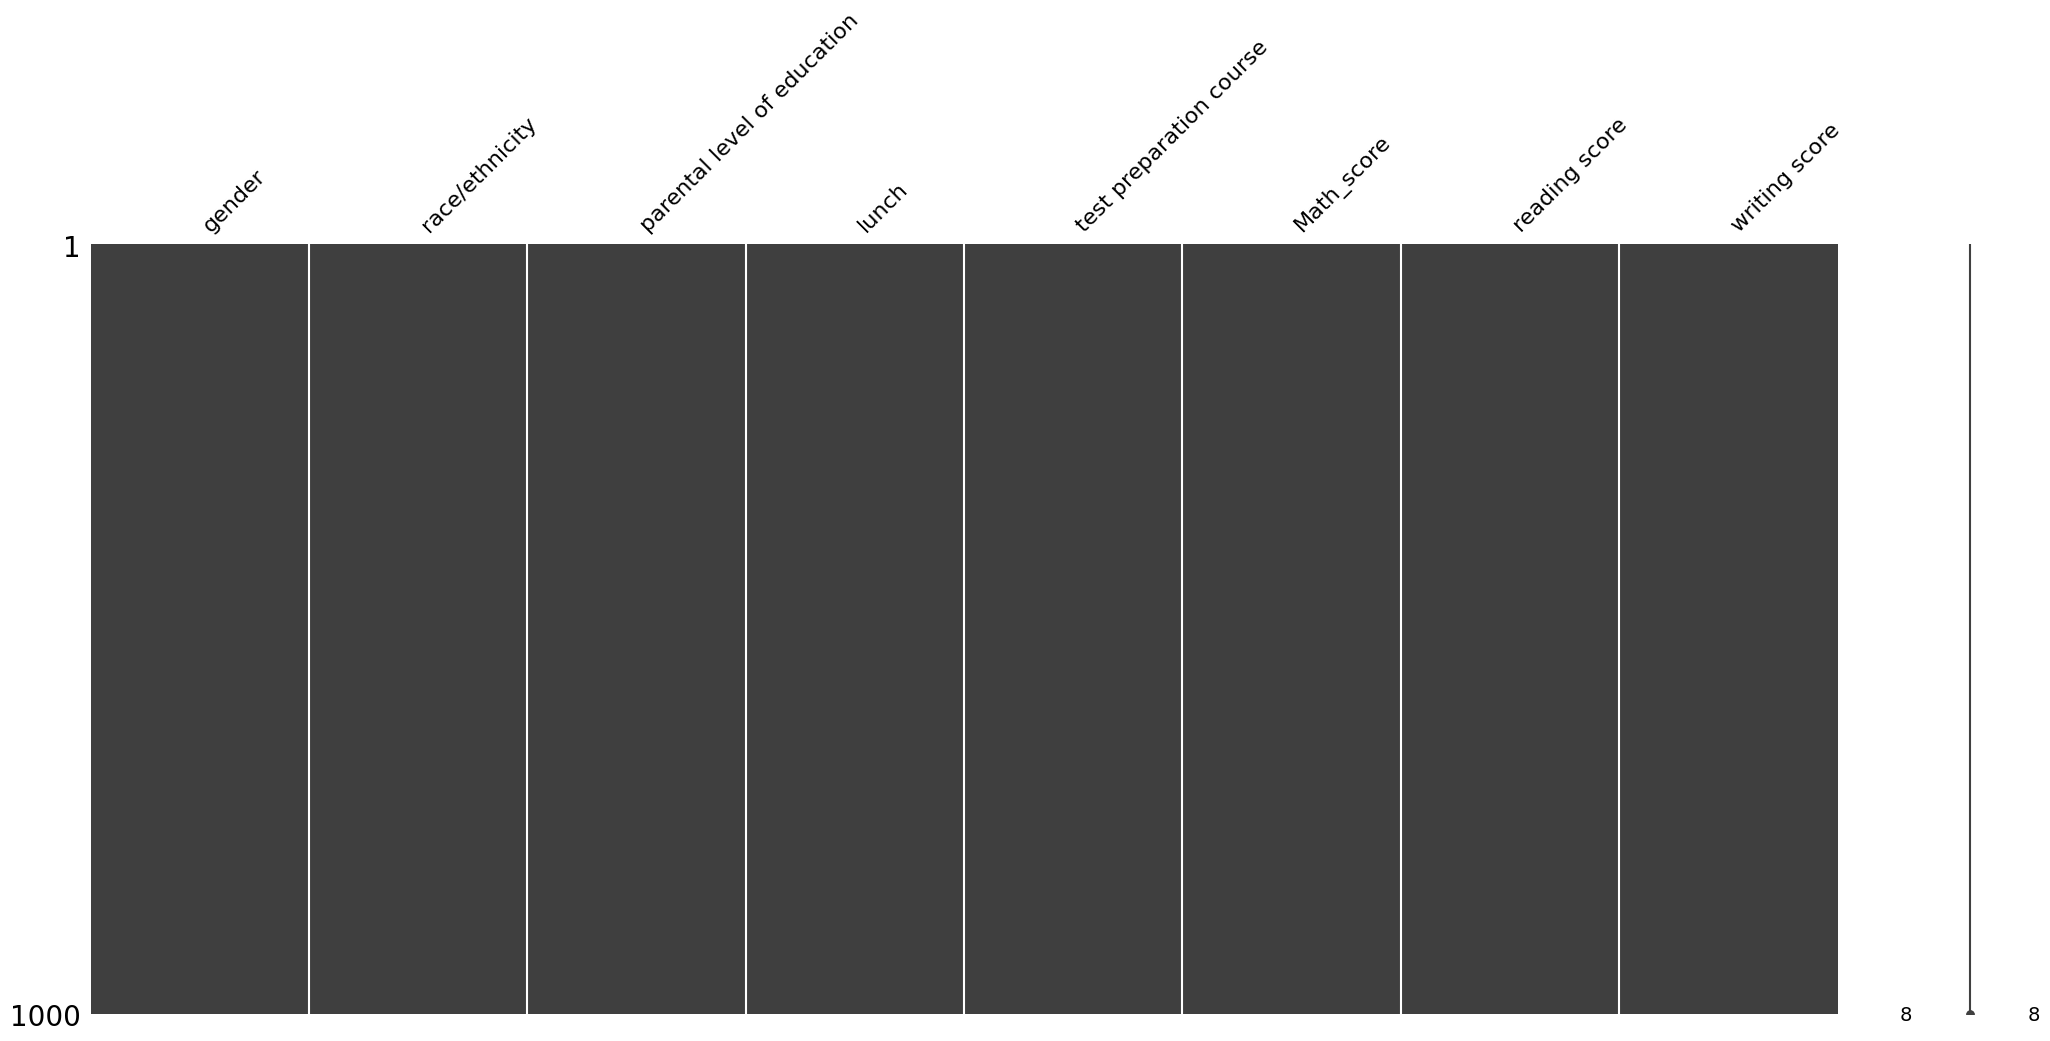

In [16]:
msno.matrix(dataset_new)

In [17]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.486000,0.645000,0.642000,67.997944,69.458915
std,1.829522,0.478753,0.479652,16.552850,29.431804
min,0.000000,0.000000,0.000000,3.000000,10.000000
25%,1.000000,0.000000,0.000000,58.000000,58.000000
50%,2.000000,1.000000,1.000000,69.000000,69.000000
75%,4.000000,1.000000,1.000000,79.000000,79.000000
max,5.000000,1.000000,1.000000,100.000000,567.000000


In [18]:
dataset_new["Math_score"].str.isdigit().count()

957

In [19]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                      object
reading score                  float64
writing score                  float64
dtype: object

In [27]:
numeric_cols = ['Math_score','reading score','writing score']

# Convert columns to numeric, coercing non-numeric values to NaN
for col in numeric_cols:
    dataset_new[col] = pd.to_numeric(dataset_new[col], errors='coerce')

medianFiller = lambda x: x.fillna(x.median())
dataset_new[numeric_cols] = dataset_new[numeric_cols].apply(medianFiller,axis=0)

dataset_new['Math_score'] = dataset_new['Math_score'].astype('float64')

In [28]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [29]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.486000,0.645000,0.642000,66.323929,67.997944,69.458915
std,1.829522,0.478753,0.479652,17.882376,16.552850,29.431804
min,0.000000,0.000000,0.000000,-89.000000,3.000000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.000000,58.000000
50%,2.000000,1.000000,1.000000,66.323929,69.000000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.000000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.000000,567.000000


/tmp/ipykernel_9692/4028893850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["writing score"]])


<Axes: ylabel='Density'>

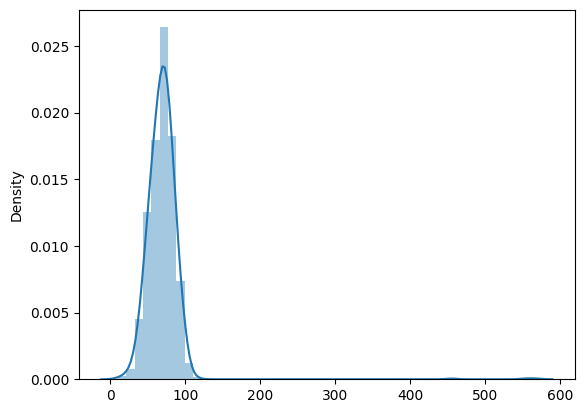

In [30]:
sns.distplot(dataset_new[["writing score"]])

/tmp/ipykernel_9692/951593757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["Math_score"]])


<Axes: ylabel='Density'>

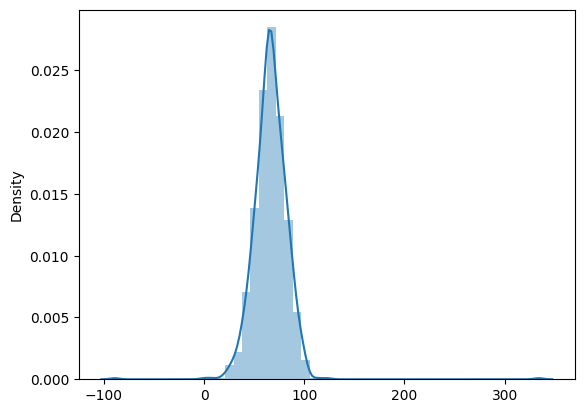

In [31]:
sns.distplot(dataset_new[["Math_score"]])

/tmp/ipykernel_9692/691998494.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["reading score"]])


<Axes: ylabel='Density'>

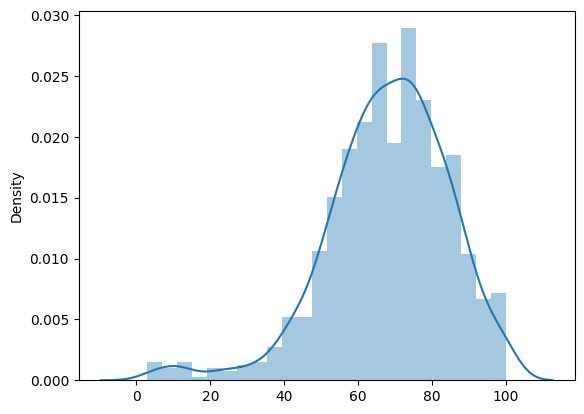

In [32]:
sns.distplot(dataset_new[["reading score"]])

/tmp/ipykernel_9692/4028893850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["writing score"]])


<Axes: ylabel='Density'>

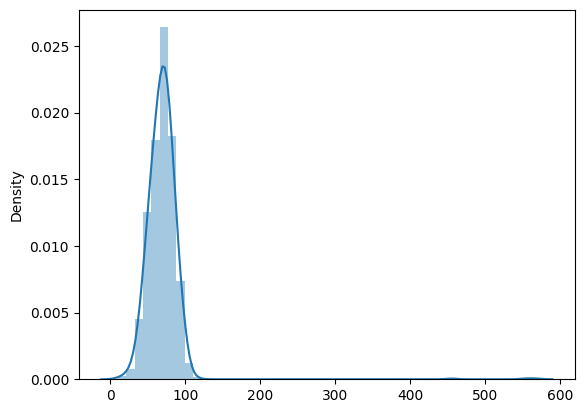

In [34]:
sns.distplot(dataset_new[["writing score"]])

In [37]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

dataset_new[['writing score']] = s.fit_transform(dataset_new[['writing score']])

/tmp/ipykernel_9692/4028893850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["writing score"]])


<Axes: ylabel='Density'>

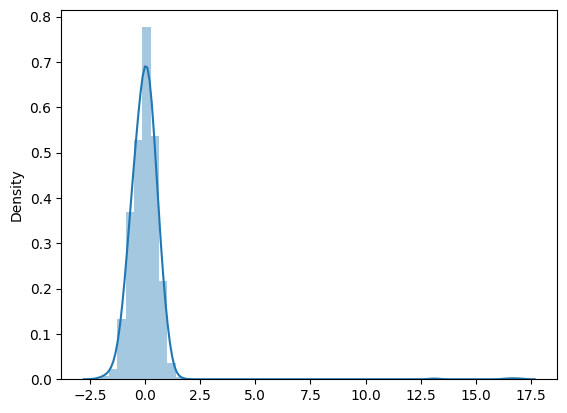

In [39]:
sns.distplot(dataset_new[["writing score"]])

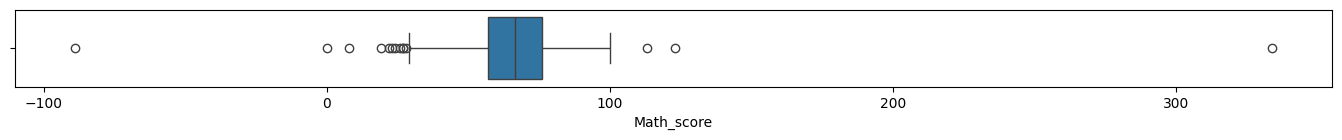

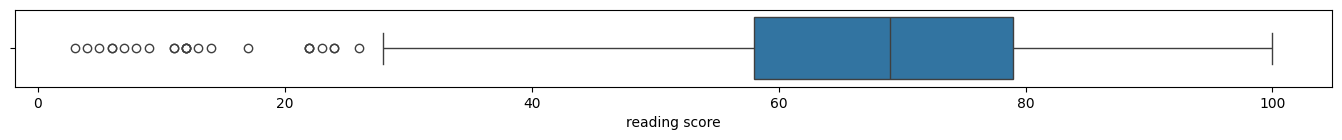

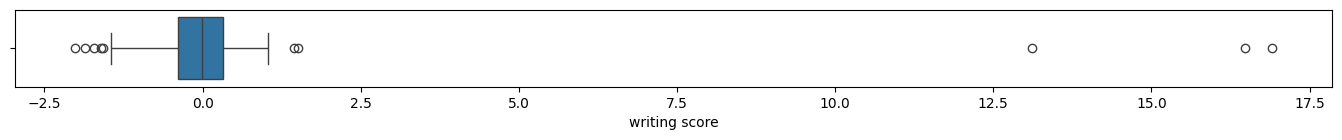

In [40]:
for column in numeric_cols:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dataset_new, x=column)

In [43]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset_new[numeric_cols]))
print(z)
threshold = 3
print(np.where(z > 3))

     Math_score  reading score  writing score
0      0.317570       0.241895       0.154369
1      0.149723       1.329866       0.630283
2      1.324652       1.632080       0.800252
3      1.081154       0.664746       0.865447
4      0.541366       0.604552       0.188363
..          ...            ...            ...
995    1.212754       1.873851       0.868240
996    0.241919       0.785632       0.491514
997    0.409766       0.181453       0.151576
998    0.093774       0.604552       0.256351
999    0.597315       1.088094       0.562295

[1000 rows x 3 columns]
(array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  59,  59, 431, 456, 474, 542, 591, 651, 980]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2,
       2, 2, 0]))


In [44]:
dataset_new_1 = dataset_new[(z < 3).all(axis=1)]
print(dataset_new.shape,dataset_new_1.shape)

(1000, 8) (976, 8)


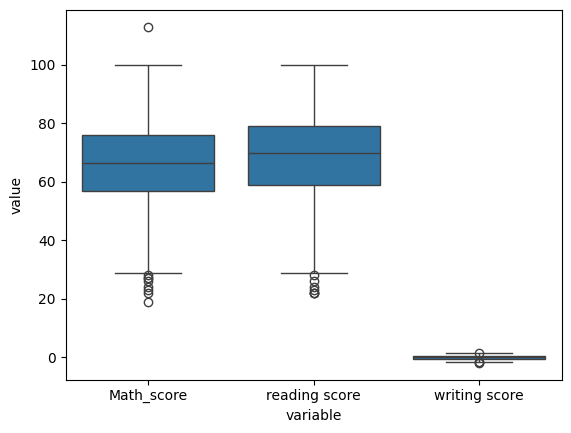

In [45]:
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new_1[numeric_cols]))

plt.show()

In [47]:
Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

dataset_new_2 = dataset_new[~((dataset_new < low) | (dataset_new > high)).any(axis=1)]
print(dataset_new.shape, dataset_new_2.shape)

TypeError: unsupported operand type(s) for -: 'str' and 'str'